### Importar Bibliotecas

In [ ]:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


### Carregar os CSVs

In [4]:

# Carregar os CSVs em DataFrames
avaliacoes_pedidos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/avaliacoes_pedidos.csv')
categorias_produtos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/categorias_produtos.csv')
clientes = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/clientes.csv')
geolocalizacao = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/geolocalizacao.csv')
itens_pedidos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/itens_pedidos.csv')
pedidos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/pedidos.csv')
pedidos_pagamentos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/pedidos_pagamentos.csv')
produtos = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/produtos.csv')
vendedores = pd.read_csv('C:/Users/user/Documents/Fadesp/desafio-analista-de-dados-fadesp/etapa_3/data/vendedores.csv')

# Visualizar primeiros registros (exemplo)
avaliacoes_pedidos.head(1)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


### Criar Banco SQLite e Salvar os Dados

In [5]:

# Criar uma conexão com SQLite
conn = sqlite3.connect('etapa3.db')

# Salvar os DataFrames como tabelas
avaliacoes_pedidos.to_sql('avaliacoes_pedidos', conn, if_exists='replace', index=False)
categorias_produtos.to_sql('categorias_produtos', conn, if_exists='replace', index=False)
clientes.to_sql('clientes', conn, if_exists='replace', index=False)
geolocalizacao.to_sql('geolocalizacao', conn, if_exists='replace', index=False)
itens_pedidos.to_sql('itens_pedidos', conn, if_exists='replace', index=False)
pedidos.to_sql('pedidos', conn, if_exists='replace', index=False)
pedidos_pagamentos.to_sql('pedidos_pagamentos', conn, if_exists='replace', index=False)
produtos.to_sql('produtos', conn, if_exists='replace', index=False)
vendedores.to_sql('vendedores', conn, if_exists='replace', index=False)


3095

### ETAPA 4 – Fazer Consultas com SQL
**Exemplo 1: Total de pedidos por status**

In [9]:

query = '''
SELECT order_status, COUNT(*) as total_pedidos
FROM pedidos
GROUP BY order_status
ORDER BY total_pedidos DESC
'''
df_status = pd.read_sql_query(query, conn)
df_status


,order_status,total_pedidos
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


### Visualizar Indicadores com Gráfico
**Gráfico: Pedidos por Status**

C:\Users\user\AppData\Local\Temp\ipykernel_8884\2302400212.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_status, x='order_status', y='total_pedidos', palette='Blues_d')


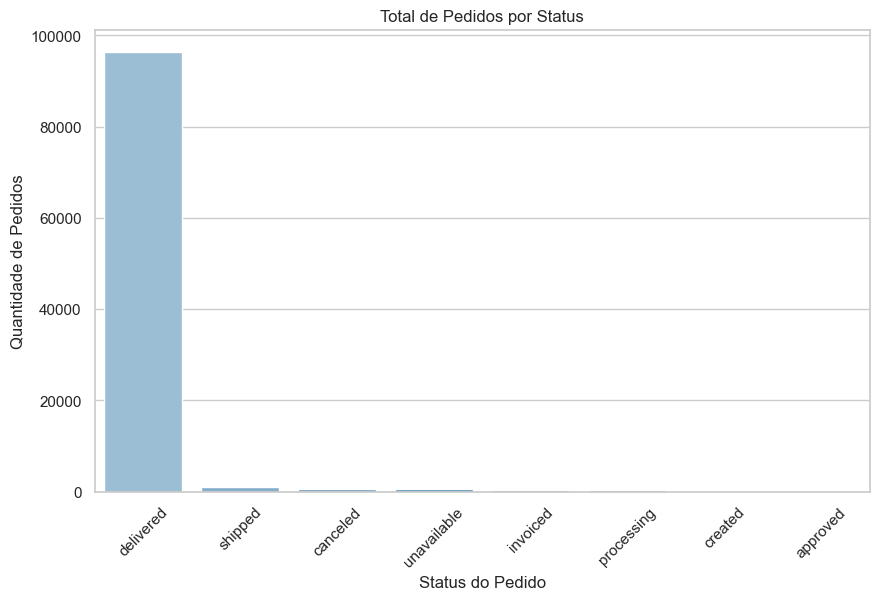

In [11]:

sns.barplot(data=df_status, x='order_status', y='total_pedidos', palette='Blues_d')
plt.title('Total de Pedidos por Status')
plt.xlabel('Status do Pedido')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.show()


### Outro Exemplo de Indicador
**Top 10 Categorias com Mais Produtos Vendidos**

In [18]:

query = '''
SELECT cp.product_category_name AS categoria, COUNT(ip.product_id) AS total_vendido
FROM itens_pedidos ip
JOIN produtos p ON ip.product_id = p.product_id
JOIN categorias_produtos cp ON p.product_category_name = cp.product_category_name
GROUP BY cp.product_category_name
ORDER BY total_vendido DESC
LIMIT 10
'''
df_top_categorias = pd.read_sql_query(query, conn)
df_top_categorias


,categoria,total_vendido
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827
5,utilidades_domesticas,6964
6,relogios_presentes,5991
7,telefonia,4545
8,ferramentas_jardim,4347
9,automotivo,4235


C:\Users\user\AppData\Local\Temp\ipykernel_8884\3193775704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_categorias, x='total_vendido', y='categoria', palette='Greens_d')


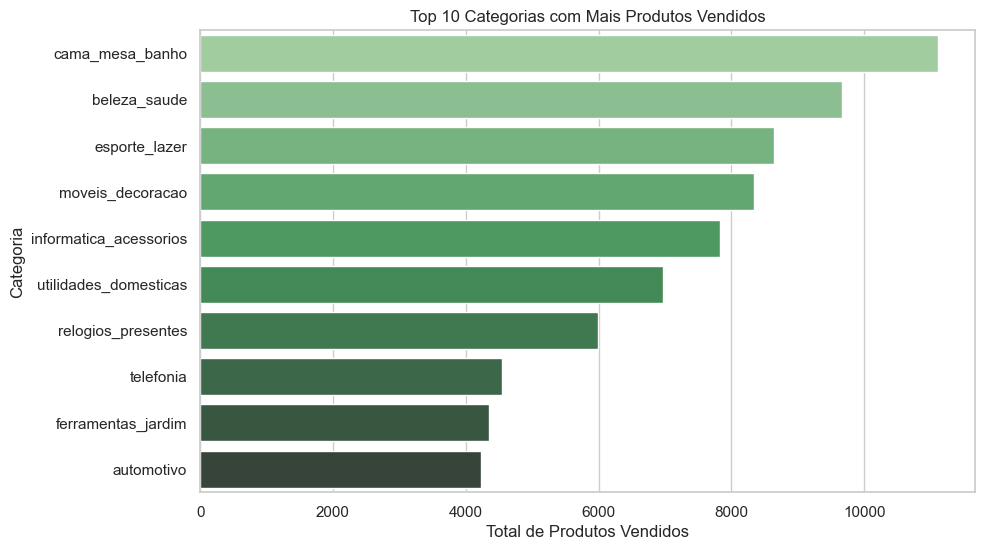

In [19]:

sns.barplot(data=df_top_categorias, x='total_vendido', y='categoria', palette='Greens_d')
plt.title('Top 10 Categorias com Mais Produtos Vendidos')
plt.xlabel('Total de Produtos Vendidos')
plt.ylabel('Categoria')
plt.show()


### Fechar a Conexão

In [20]:

conn.close()
